cuda
28140
Epoch: 1 |train loss: 2.299 
Epoch: 1 |test loss: 2.294 |accuracy: 10 %
Epoch: 1 |train loss: 2.282 
Epoch: 1 |test loss: 2.268 |accuracy: 34 %
Epoch: 1 |train loss: 2.219 
Epoch: 1 |test loss: 2.109 |accuracy: 39 %
Epoch: 2 |train loss: 1.490 
Epoch: 2 |test loss: 0.986 |accuracy: 68 %
Epoch: 2 |train loss: 0.708 
Epoch: 2 |test loss: 0.566 |accuracy: 82 %
Epoch: 2 |train loss: 0.474 
Epoch: 2 |test loss: 0.398 |accuracy: 92 %
Epoch: 3 |train loss: 0.367 
Epoch: 3 |test loss: 0.335 |accuracy: 90 %
Epoch: 3 |train loss: 0.336 
Epoch: 3 |test loss: 0.289 |accuracy: 92 %
Epoch: 3 |train loss: 0.282 
Epoch: 3 |test loss: 0.262 |accuracy: 95 %
Epoch: 4 |train loss: 0.246 
Epoch: 4 |test loss: 0.214 |accuracy: 95 %
Epoch: 4 |train loss: 0.220 
Epoch: 4 |test loss: 0.217 |accuracy: 95 %
Epoch: 4 |train loss: 0.205 
Epoch: 4 |test loss: 0.218 |accuracy: 95 %
Epoch: 5 |train loss: 0.169 
Epoch: 5 |test loss: 0.186 |accuracy: 95 %
Epoch: 5 |train loss: 0.171 
Epoch: 5 |test loss: 0.1

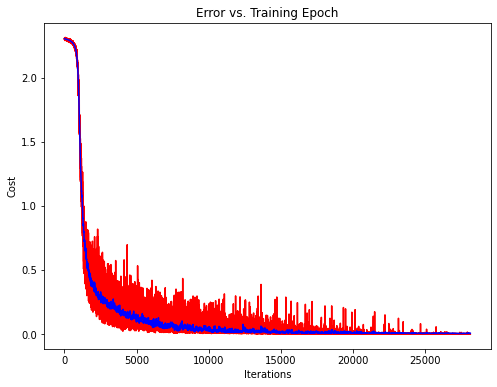

In [2]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
# 1 prepare dataset

batch_size = 64

# ToTensor  转换图片为张量
# Normalized an tensor image with mean and standard deviation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
train_dataset = datasets.MNIST(root='./data/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='./data/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

# 2 design model

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1792),
    nn.ReLU(),
    nn.Linear(1792, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    )


model.to(device)

# 3 交叉熵损失函数 优化器
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)


optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)

# 4 training cycle forward, backward, update
def train(epoch, train_cost, test_cost, mo):
    running_loss = 0.0
    for step, data in enumerate(train_loader, 0):
        mo.train()
        inputs, target = data
        inputs = inputs.to(device)
        target = target.to(device)
        optimizer.zero_grad()

        outputs = mo(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        train_cost[step] = loss.item()

        test_losses = 0
        mo.eval()
        correct = 0
        total = 0
        # print(step)
        with torch.no_grad():
            for s, l_data in enumerate(test_loader, 0):
                images, labels = l_data
                images = images.to(device)
                labels = labels.to(device)
                l_outputs = mo(images)
                test_loss = criterion(l_outputs, labels)
                test_losses = test_loss.item()
                _, predicted = torch.max(l_outputs.data, dim=1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                break
            test_cost[step] = test_losses
        if step % 300 == 299:
            print('Epoch: %d |train loss: %.3f ' % (epoch + 1, running_loss/300))
            print('Epoch: %d |test loss: %.3f |accuracy: %d %%' % (epoch + 1, test_losses, 100 * correct / total))
            running_loss = 0.0
    return train_cost




def show(cost, test):
    fig, bx = plt.subplots(figsize=(8, 6))
    bx.plot(np.arange(len(cost)), cost, 'r', label='train_loss')
    bx.plot(np.arange(len(test)), test, 'b', label='test_loss')

    bx.set_xlabel('Iterations')
    bx.set_ylabel('Cost')
    bx.set_title('Error vs. Training Epoch')
    plt.show()


def jn_cnn(mo, e):
    length = len(train_loader) * e
    print(length)
    train_cost_all = []
    test_cost_all = []
    for epoch in range(e):
        train_cost = [0 for i in range(len(train_loader))]
        test_cost = [0 for i in range(len(train_loader))]

        train_cost = train(epoch, train_cost, test_cost, mo)

        train_cost_all = train_cost_all + train_cost
        test_cost_all = test_cost_all + test_cost

    show(np.array(train_cost_all), np.array(test_cost_all))


jn_cnn(model, 30)


cuda
28140
Epoch: 1 |train loss: 2.312 
Epoch: 1 |test loss: 2.308 |accuracy: 9 %
Epoch: 1 |train loss: 2.304 
Epoch: 1 |test loss: 2.302 |accuracy: 17 %
Epoch: 1 |train loss: 2.301 
Epoch: 1 |test loss: 2.296 |accuracy: 23 %
Epoch: 2 |train loss: 2.295 
Epoch: 2 |test loss: 2.289 |accuracy: 15 %
Epoch: 2 |train loss: 2.282 
Epoch: 2 |test loss: 2.265 |accuracy: 23 %
Epoch: 2 |train loss: 2.240 
Epoch: 2 |test loss: 2.164 |accuracy: 25 %
Epoch: 3 |train loss: 2.146 
Epoch: 3 |test loss: 2.034 |accuracy: 25 %
Epoch: 3 |train loss: 2.054 
Epoch: 3 |test loss: 1.980 |accuracy: 26 %
Epoch: 3 |train loss: 1.989 
Epoch: 3 |test loss: 1.948 |accuracy: 35 %
Epoch: 4 |train loss: 1.925 
Epoch: 4 |test loss: 1.913 |accuracy: 37 %
Epoch: 4 |train loss: 1.869 
Epoch: 4 |test loss: 1.888 |accuracy: 35 %
Epoch: 4 |train loss: 1.811 
Epoch: 4 |test loss: 1.864 |accuracy: 37 %
Epoch: 5 |train loss: 1.738 
Epoch: 5 |test loss: 1.798 |accuracy: 37 %
Epoch: 5 |train loss: 1.659 
Epoch: 5 |test loss: 1.67

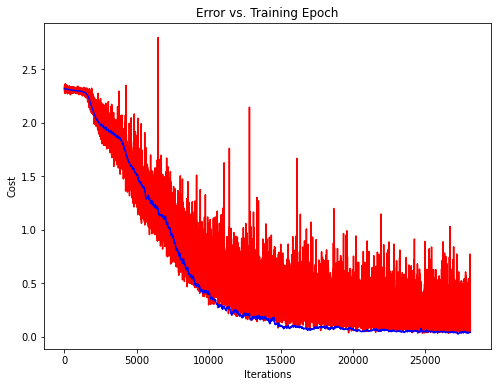

In [3]:
print(device)

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 1792),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(1792, 1024),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(p=0.7),
    nn.Linear(128, 10),
)
model.to(device)
# 3 交叉熵损失函数 优化器
# 3 交叉熵损失函数 优化器
criterion = torch.nn.CrossEntropyLoss().to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.0001)


optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum=0.9)

jn_cnn(model,30)

